In [165]:
#Lucas Ross 7 Feb 2023

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [166]:
#set row and col preferences
pd.set_option("display.max_columns",None) #no limit on columns displayed
pd.set_option("display.max_rows",200)

#import df
df = pd.read_csv("anime.csv")
df.head(5)


,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],1,103707.0,14351,25810,2656,4.702,86547.0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Movie,1.0,1hr 47min,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],0,58831.0,1453,21733,124,4.663,43960.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,A Silent Voice,Movie,1.0,2hr 10min,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],1,45892.0,946,17148,132,4.661,33752.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],0,25134.0,2183,8082,167,4.660,17422.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],1,21308.0,3217,7864,174,4.650,15789.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Part 1: Data Pre-Processing

In [167]:
print(df.info()) #get info on each column
df.describe(include="all").T #get EDA metrics

#df.info() tells us that mediaType,eps,duration,startYr,finishYr,sznOfRelease,description,
#watched,rating,votes have NaN values

#it also tells us that duration needs to go from string --> float (we know because of df column descriptions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         14578 non-null  object 
 1   mediaType                     14510 non-null  object 
 2   eps                           14219 non-null  float64
 3   duration                      9137 non-null   object 
 4   ongoing                       14578 non-null  bool   
 5   startYr                       14356 non-null  float64
 6   finishYr                      14134 non-null  float64
 7   sznOfRelease                  3767 non-null   object 
 8   description                   8173 non-null   object 
 9   studios                       14578 non-null  object 
 10  contentWarn                   14578 non-null  int64  
 11  watched                       14356 non-null  float64
 12  watching                      14578 non-null  int64  
 13  w

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,14578,14578,Fullmetal Alchemist: Brotherhood,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,14510,8,TV,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,14219.0,NaN,NaN,NaN,13.501231,62.262185,1.0,1.0,1.0,12.0,2527.0
duration,9137,147,4min,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ongoing,14578,2,False,14356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,14356.0,NaN,NaN,NaN,2005.457788,14.707105,1907.0,2000.0,2010.0,2016.0,2026.0
finishYr,14134.0,NaN,NaN,NaN,2005.515919,14.656509,1907.0,2000.0,2010.0,2016.0,2026.0
sznOfRelease,3767,4,Spring,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,8173,8108,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studios,14578,864,[],4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
#RATING
print(df["rating"]) #theres some NaN values,so lets replace those with the median
med = df["rating"].median()

#get all rows with NaN,replace with med
df.loc[df["rating"].isna(),"rating"] = med
print(df["rating"])

0        4.702
1        4.663
2        4.661
3        4.660
4        4.650
         ...  
14573      NaN
14574      NaN
14575      NaN
14576      NaN
14577      NaN
Name: rating, Length: 14578, dtype: float64
0        4.702
1        4.663
2        4.661
3        4.660
4        4.650
         ...  
14573    2.965
14574    2.965
14575    2.965
14576    2.965
14577    2.965
Name: rating, Length: 14578, dtype: float64


In [169]:
#DURATION
print(df["duration"])

#lets convert string --> number
def str_to_mins(val):
    if isinstance(val,str):
        split = val.split("hr ")
        if len(split) > 1: #its both (xxhr xxmin)
            hr = float(split[0])
            min = float(split[1].removesuffix("min"))
            return min + (hr * 60)
        else:
            if split[0].removesuffix("min") == split[0]:
                return float(split[0]) * 60  #its in hours (xxhr)
            else:
                min = split[0].removesuffix("min")
                return float(min) #its in mins (xxmin)
    else:
        return val #either NaN or already number

df["duration"] = df["duration"].apply(str_to_mins)
print(df["duration"])

0              NaN
1        1hr 47min
2        2hr 10min
3              NaN
4              NaN
           ...    
14573          NaN
14574         4min
14575         1min
14576          NaN
14577         3min
Name: duration, Length: 14578, dtype: object
0          NaN
1        107.0
2        130.0
3          NaN
4          NaN
         ...  
14573      NaN
14574      4.0
14575      1.0
14576      NaN
14577      3.0
Name: duration, Length: 14578, dtype: float64


In [170]:
#STUDIOS
#currently in the format ['x'],so lets remove [] and ''
print(df["studios"])

def clean_studios(val):
    if isinstance(val,str):
        val = val.removeprefix("[")
        val = val.removesuffix("]")
        val = val.replace("'","")
        if val == "":
            return np.nan
        else:
            return val
    else:
        return np.nan #already NaN

df["studios"] = df["studios"].apply(clean_studios)
print(df["studios"])

0                   ['Bones']
1        ['CoMix Wave Films']
2         ['Kyoto Animation']
3          ['Production I.G']
4              ['Wit Studio']
                 ...         
14573                      []
14574                      []
14575                      []
14576             ['Makaria']
14577                      []
Name: studios, Length: 14578, dtype: object
0                   Bones
1        CoMix Wave Films
2         Kyoto Animation
3          Production I.G
4              Wit Studio
               ...       
14573                 NaN
14574                 NaN
14575                 NaN
14576             Makaria
14577                 NaN
Name: studios, Length: 14578, dtype: object


In [171]:
#STUDIOS

print(df["studios"].value_counts())
#clearly theres a lot of unique values,most are comma-separately which means multiple studios collaborated

#we can make a series to only track studios
allstudios = df.studios.str.split(",",expand=True).values.flatten()

stsums = pd.DataFrame({"studios": allstudios}).value_counts() #make a df with 1 column so we can use value_counts()
print(stsums)

Toei Animation          683
Sunrise                 440
J.C. Staff              339
TMS Entertainment       319
MADHOUSE                315
                       ... 
Bee Media, Actas          1
Trinet Entertainment      1
aNCHOR, LIDEN FILMS       1
Beat Frog                 1
Studio Kaab               1
Name: studios, Length: 863, dtype: int64
studios          
Toei Animation       687
Sunrise              449
TMS Entertainment    356
J.C. Staff           349
MADHOUSE             333
                    ... 
 Project No. 9         1
Soeishinsha            1
Sofix                  1
 Plum                  1
HORNETS                1
Length: 688, dtype: int64


In [172]:
#STUDIOS

#now that we know allstudios contains every studio and its frequency,lets one-hot encode all of the studios with a sep. df
df2 = pd.DataFrame()
threshold = 50 #if a studio isnt in 50 or more animes,it gets deleted

for i in stsums.index.values:
    studio = i[0]
    #threshold implementation
    if stsums.get(studio) >= threshold:
        df2[studio] = [0 for x in range(0,df.shape[0])]

df2.head(1) #this df correlates to the animes,but is in a separate df

,Toei Animation,Sunrise,TMS Entertainment,J.C. Staff,MADHOUSE,Production I.G,Studio Deen,Studio Pierrot,OLM,A-1 Pictures,Shin-Ei Animation,DLE,AIC,Nippon Animation,Tatsunoko Production,XEBEC,Bones,GONZO,Shaft,Kyoto Animation,Group TAC,SILVER LINK,Ashi Productions,Satelight,Doga Kobo,Studio 4°C,Gainax,Magic Bus,Tezuka Productions,Zexcs,CoMix Wave Films,ufotable,Mushi Production,Gallop,ARMS,feel.,Studio Comet,Mappa,Lerche,Studio Ghibli,Wit Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [173]:
#STUDIOS

#now lets populate df2 with values
index = 0
for i in df.studios:
    for j in str(i).split(", "): #for each studio
        df2.loc[index][j] = 1 #locate the one-hot encoded part, make it true
    index += 1

df2.head(5)

,Toei Animation,Sunrise,TMS Entertainment,J.C. Staff,MADHOUSE,Production I.G,Studio Deen,Studio Pierrot,OLM,A-1 Pictures,Shin-Ei Animation,DLE,AIC,Nippon Animation,Tatsunoko Production,XEBEC,Bones,GONZO,Shaft,Kyoto Animation,Group TAC,SILVER LINK,Ashi Productions,Satelight,Doga Kobo,Studio 4°C,Gainax,Magic Bus,Tezuka Productions,Zexcs,CoMix Wave Films,ufotable,Mushi Production,Gallop,ARMS,feel.,Studio Comet,Mappa,Lerche,Studio Ghibli,Wit Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='finishYr', ylabel='Count'>

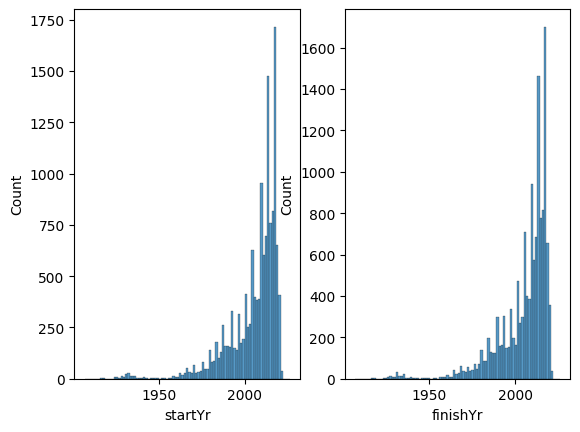

In [174]:
#STARTYR + FINISHYR

#lets see how normally-distributed the numbers are to determine whether to
#a) drop the NaN values or b) fill NaN values with mean
plt.subplot(1,2,1)
sns.histplot(data=df,x="startYr")
plt.subplot(1,2,2)
sns.histplot(data=df,x="finishYr")

#both of them are left-skewed (i.e. very dispersed data),so it seems better to just drop the NaN values because the 
#mean wont accurately represent the dataset

In [175]:
#STARTYR + FINISHYR

#drop all NaN vals
for i in df.loc[df["startYr"].isna(),"startYr"].index:
    df.drop(df.index[i])
    df.drop(df2.index[i])
df.dropna(subset="startYr",inplace=True)
df.dropna(subset="finishYr",inplace=True)

#reset the dataframe index (put all remaining rows back on the indicies of 1,2,3,... after dropping some rows)
df.reset_index(inplace=True,drop=True)

#see how many NaN values are in startYr and finishYr
df[["startYr","finishYr"]].isna().sum()

startYr     0
finishYr    0
dtype: int64

In [176]:
#STARTYR + FINISHYR

#lets also make a new column to represent how many years the anime ran for,and drop the startyr/finishyr after
df["durationYrs"] = df["finishYr"] - df["startYr"]
df.drop("startYr",axis=1,inplace=True)
df.drop("finishYr",axis=1,inplace=True)
df.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,durationYrs
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,Bones,1,103707.0,14351,25810,2656,4.702,86547.0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,your name.,Movie,1.0,107.0,False,NaN,Mitsuha and Taki are two total strangers livin...,CoMix Wave Films,0,58831.0,1453,21733,124,4.663,43960.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,A Silent Voice,Movie,1.0,130.0,False,NaN,"After transferring into a new school, a deaf g...",Kyoto Animation,1,45892.0,946,17148,132,4.661,33752.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",Production I.G,0,25134.0,2183,8082,167,4.660,17422.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,Wit Studio,1,21308.0,3217,7864,174,4.650,15789.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [177]:
#SZNOFRELEASE

#we dont know what to fill in for the NaN values,so we can use another string to indicate that
df["sznOfRelease"].fillna("Unknown",inplace=True)

#lets check the value counts to see how many NaN still exist and how many were replaced by "Unknown"
df["sznOfRelease"].value_counts()

Unknown    10475
Spring      1129
Fall        1058
Winter       748
Summer       724
Name: sznOfRelease, dtype: int64

In [178]:
#MEDIATYPE

#lets do the exact same thing as we did for SznOfRelease
#mediatype already has a trash-bin category: "Other",so lets use that
df["mediaType"].fillna("Other",inplace=True)

df["mediaType"].value_counts()

TV             4343
Movie          2473
OVA            2069
Music Video    1593
Web            1435
DVD Special     843
Other           773
TV Special      605
Name: mediaType, dtype: int64

In [179]:
print(df.isna().sum()) #check how many cols still have NaN

#eps,duration,and votes are number columns (see dtypes above),so lets fill them with their medians
df.eps.fillna(df.eps.median(),inplace=True)
df.duration.fillna(df.duration.median(),inplace=True)
df.votes.fillna(df.votes.median(),inplace=True)

#description and studios are fine as is because theyre strings

title                              0
mediaType                          0
eps                              175
duration                        5146
ongoing                            0
sznOfRelease                       0
description                     6139
studios                         4578
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                           2136
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
t

# Part 2: EDA and Data Visualization

#### Univariate Analysis

In [180]:
#some attributes are unique to each row and wont affect our visualization,lets drop them
df.drop("title",axis=1,inplace=True)
df.drop("description",axis=1,inplace=True)
df

,mediaType,eps,duration,ongoing,sznOfRelease,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,durationYrs
0,TV,64.0,8.0,False,Spring,Bones,1,103707.0,14351,25810,2656,4.702,86547.0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,Movie,1.0,107.0,False,Unknown,CoMix Wave Films,0,58831.0,1453,21733,124,4.663,43960.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,Movie,1.0,130.0,False,Unknown,Kyoto Animation,1,45892.0,946,17148,132,4.661,33752.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,TV,10.0,8.0,False,Fall,Production I.G,0,25134.0,2183,8082,167,4.660,17422.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
4,TV,10.0,8.0,False,Spring,Wit Studio,1,21308.0,3217,7864,174,4.650,15789.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,TV,1.0,8.0,False,Summer,Mappa,0,0.0,0,1843,0,2.965,221.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
14130,TV,1.0,8.0,False,Unknown,NaN,0,0.0,0,1106,0,2.965,221.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
14131,Music Video,1.0,4.0,False,Unknown,NaN,0,9.0,1,7,1,2.965,221.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0
14132,OVA,1.0,1.0,False,Unknown,NaN,0,3.0,0,7,0,2.965,221.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0


In [181]:
#lets make a univariate analysis data visualization function for numeric data
def analysis_numeric(col,bins=20): #bins = number of bins for histplot (default 20)
    plt.subplot(2,1,1)
    sns.histplot(data=df,x=col,bins=bins,kde=True)

    plt.subplot(2,1,2)
    sns.boxplot(data=df,x=col)

    print(df[col].describe(include="all"))

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature]) # length of the column
    count = data[feature].nunique()
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) # percentage of each class of the category
        else:
            label = p.get_height() # count of each level of the category
            x = p.get_x() + p.get_width() / 2 # width of the plot
            y = p.get_height() # height of the plot
            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            ) # annotate the percentage

#and a univariate AND bivariate analysis data visualization function for categorical data
def analysis_categorical(col,boxy,bins=20): #box = numeric y column for boxplot
    plt.subplot(2,1,1)
    labeled_barplot(df, col, True)

    plt.subplot(2,1,2)
    sns.boxplot(data=df,y=boxy,x=col)
    
    print(df[col].describe(include="all"))
    

count    14134.000000
mean         2.947869
std          0.761161
min          0.844000
25%          2.429000
50%          2.965000
75%          3.491000
max          4.702000
Name: rating, dtype: float64


'\nData Description\n- mean is 2.94\n- float type\n- range of values is (0.84, 4.70)\n- standard deviation is 0.76\n- interquartile range is (2.42, 3.49)\n\nData Cleaning\n- NaN values were replaced with median\n\nObservations\n- not perfectly normally-distributed but not skewed either\n- no outliers might suggest that the voting is accurate\n- if there were outliers,it could be because very specific factors/conditions\n'

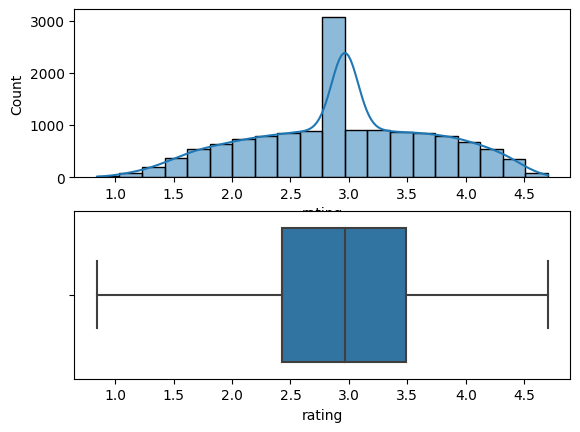

In [182]:
analysis_numeric("rating")

'''
Data Description
- mean is 2.94
- float type
- range of values is (0.84, 4.70)
- standard deviation is 0.76
- interquartile range is (2.42, 3.49)

Data Cleaning
- NaN values were replaced with median

Observations
- not perfectly normally-distributed but not skewed either
- no outliers might suggest that the voting is accurate
- if there were outliers,it could be because very specific factors/conditions
'''

count     14134.00000
mean       1811.50750
std        5519.77271
min          10.00000
25%          48.00000
50%         221.00000
75%        1011.00000
max      131067.00000
Name: votes, dtype: float64


'\nData Description\n- mean is 1811\n- float type (although it would make more sense as integer)\n- range of values is (10, 131067)\n- standard deviation is 5519.77\n- interquartile range is (48, 1011)\n\nData Cleaning\n- no data preprocessing done\n\nObservations\n- very dispersed,very right-skewed (lots of outliers at higher values)\n- this might indicate that only a select few are the most popular and therefore have the most user interaction with its rating\n- the rating might not be that accurate for animes with low votes\n'

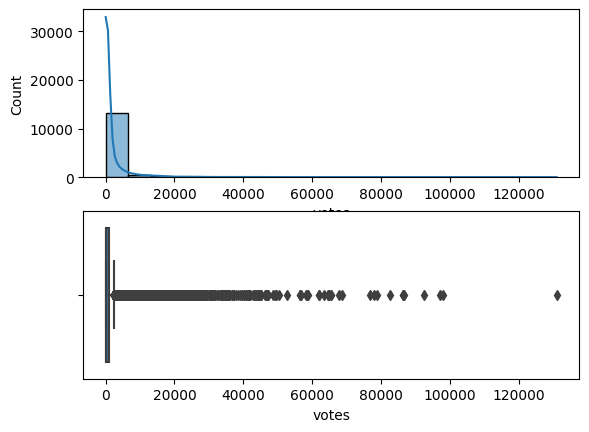

In [183]:
analysis_numeric("votes")

'''
Data Description
- mean is 1811
- float type (although it would make more sense as integer)
- range of values is (10, 131067)
- standard deviation is 5519.77
- interquartile range is (48, 1011)

Data Cleaning
- no data preprocessing done

Observations
- very dispersed,very right-skewed (lots of outliers at higher values)
- this might indicate that only a select few are the most popular and therefore have the most user interaction with its rating
- the rating might not be that accurate for animes with low votes
'''

count    14134.000000
mean         0.241970
std          0.772065
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: durationYrs, dtype: float64


'\nData Description\n- mean is 0.24\n- float type (although it would make more sense as integer)\n- range of values is (0, 26)\n- standard deviation is 0.77\n- interquartile range is (0, 0)\n\nData Cleaning\n- durationYrs was calculated from finishYr - startYr\n- this only applies to animes that are not ongoing! the rest were dropped\n\nObservations\n- its clear that most (75%) animes ran for less than a year (durationYrs = 0.0 since startYr = finishYr)\n- makes sense for smaller animes, so outliers may indicate larger animes that spanned many seasons\n'

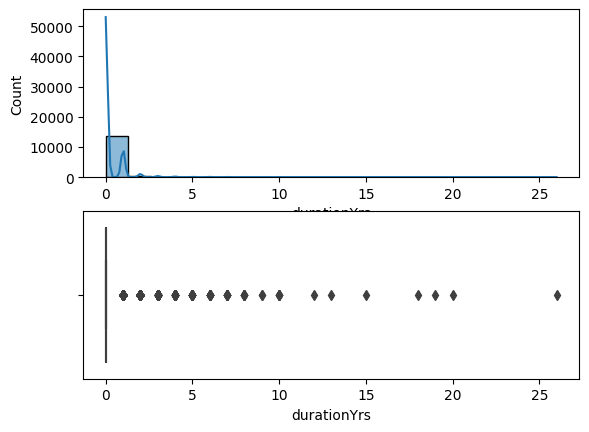

In [184]:
analysis_numeric("durationYrs")

'''
Data Description
- mean is 0.24
- float type (although it would make more sense as integer)
- range of values is (0, 26)
- standard deviation is 0.77
- interquartile range is (0, 0)

Data Cleaning
- durationYrs was calculated from finishYr - startYr
- this only applies to animes that are not ongoing! the rest were dropped

Observations
- its clear that most (75%) animes ran for less than a year (durationYrs = 0.0 since startYr = finishYr)
- makes sense for smaller animes, so outliers may indicate larger animes that spanned many seasons
'''

count    14134.000000
mean        12.090208
std         44.917593
min          1.000000
25%          1.000000
50%          1.000000
75%         12.000000
max       1818.000000
Name: eps, dtype: float64


'\nData Description\n- mean is 12.09\n- float type (although it would make more sense as integer)\n- range of values is (1, 1818)\n- standard deviation is 44.91\n- interquartile range is (1, 12)\n\nData Cleaning\n- no data preprocessing done\n\nObservations\n- its clear that most (75%) animes ran for less than a year (durationYrs = 0.0 since startYr = finishYr)\n- makes sense for smaller animes, so outliers may indicate larger animes that spanned many seasons\n'

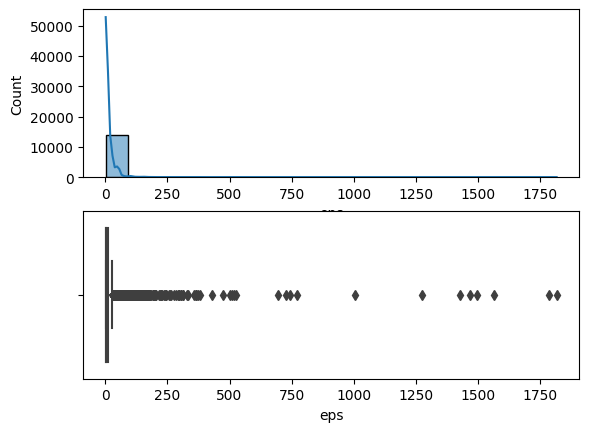

In [185]:
analysis_numeric("eps")

#aligns with durationYrs,longer run time = more episodes

'''
Data Description
- mean is 12.09
- float type (although it would make more sense as integer)
- range of values is (1, 1818)
- standard deviation is 44.91
- interquartile range is (1, 12)

Data Cleaning
- no data preprocessing done

Observations
- its clear that most (75%) animes ran for less than a year (durationYrs = 0.0 since startYr = finishYr)
- makes sense for smaller animes, so outliers may indicate larger animes that spanned many seasons
'''

count    14134.000000
mean        18.001344
std         25.803810
min          1.000000
25%          5.000000
50%          8.000000
75%         15.000000
max        235.000000
Name: duration, dtype: float64


'\nData Description\n- mean is 18\n- float type (although it would make more sense as integer)\n- range of values is (1, 235) (in minutes)\n- standard deviation is 25.80\n- interquartile range is (1, 15)\n\nData Cleaning\n- duration went from string to number\n- extra formatting (__hr __min) was stripped\n\nObservations\n- a vast majority of animes have <= 10 minute episodes\n- the outliers may be explained by movies, which tend to be hours on average\n- large standard deviation can be explained by mediaType (many different anime formats = different average durations)\n'

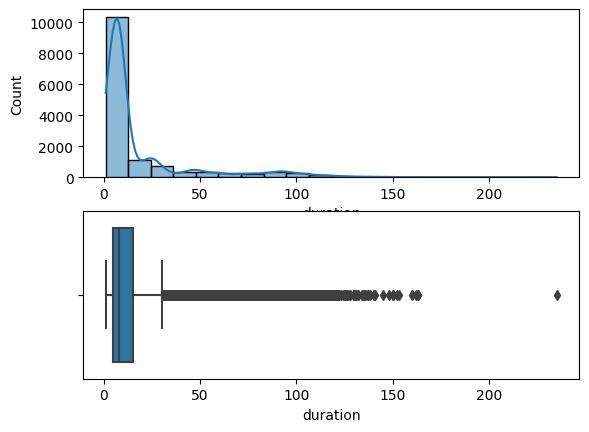

In [186]:
analysis_numeric("duration")

#a vast majority of animes have <= 10 minute episodes
#the outliers may be explained by movies, which tend to be hours on average

'''
Data Description
- mean is 18
- float type (although it would make more sense as integer)
- range of values is (1, 235) (in minutes)
- standard deviation is 25.80
- interquartile range is (1, 15)

Data Cleaning
- duration went from string to number
- extra formatting (__hr __min) was stripped

Observations
- a vast majority of animes have <= 10 minute episodes
- the outliers may be explained by movies, which tend to be hours on average
- large standard deviation can be explained by mediaType (many different anime formats = different average durations)
'''

count     14134.000000
mean       2445.828499
std        7218.055962
min           0.000000
25%          27.000000
50%         176.500000
75%        1522.500000
max      161567.000000
Name: watched, dtype: float64


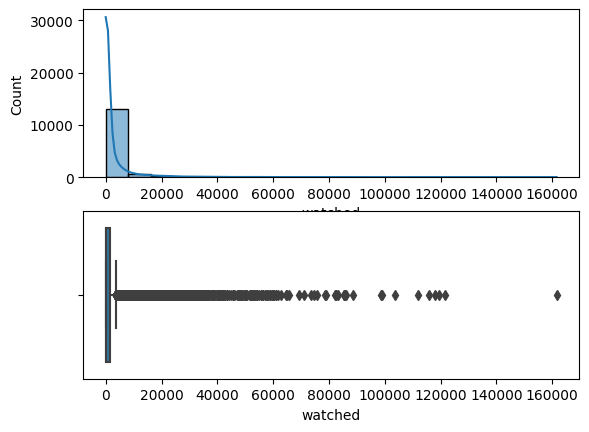

In [187]:
analysis_numeric("watched")

#most animes have been watched around 2446 times, with a few outliers indicating VERY popular animes (i.e. 160000 watched)
#this may indicate that a lot of animes are not mainstream



count    14134.000000
mean       202.534527
std       1050.113723
min          0.000000
25%          1.000000
50%          7.000000
75%         65.000000
max      69004.000000
Name: watching, dtype: float64


'\nData Description\n- mean is 203\n- float type (although it would make more sense as integer)\n- range of values is (0, 69004)\n- standard deviation is 1050.11\n- interquartile range is (1, 65)\n\nData Cleaning\n- duration went from string to number\n- extra formatting (__hr __min) was stripped\n\nObservations\n- average number of people watching the anime is 203, which could indicate that this dataset was taken when no new animes\n  were being made, and most of the popular ones had been watched already, or\n  this data is inconclusive, since all ongoing animes were dropped so we cant compare old to new anime\n- very high range of values and standard deviation indicates that there might not be too many patterns\n'

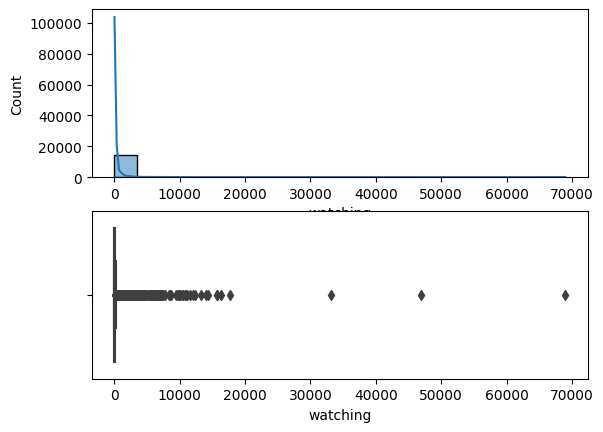

In [188]:
analysis_numeric("watching")


'''
Data Description
- mean is 203
- float type (although it would make more sense as integer)
- range of values is (0, 69004)
- standard deviation is 1050.11
- interquartile range is (1, 65)

Data Cleaning
- duration went from string to number
- extra formatting (__hr __min) was stripped

Observations
- average number of people watching the anime is 203, which could indicate that this dataset was taken when no new animes
  were being made, and most of the popular ones had been watched already, or
  this data is inconclusive, since all ongoing animes were dropped so we cant compare old to new anime
- very high range of values and standard deviation indicates that there might not be too many patterns
'''

count    14134.000000
mean      1036.924296
std       2161.963128
min          0.000000
25%         24.000000
50%        181.000000
75%       1007.000000
max      28541.000000
Name: wantWatch, dtype: float64


'\nData Description\n- mean is 1036.92\n- float type (although it would make more sense as integer)\n- range of values is (0, 28541)\n- standard deviation is 2161.96\n- interquartile range is (24, 1007)\n\nData Cleaning\n- no data preprocessing done\n\nObservations\n- since this dataset was taken during quarantine (2020), when TV shows/movies had became more popular, it makes sense\n  that a lot of animes have a high wantWatch value, as many users must be binging many animes on the site\n- right-skewed, still proving that only the top few animes are popular (which models real life)\n'

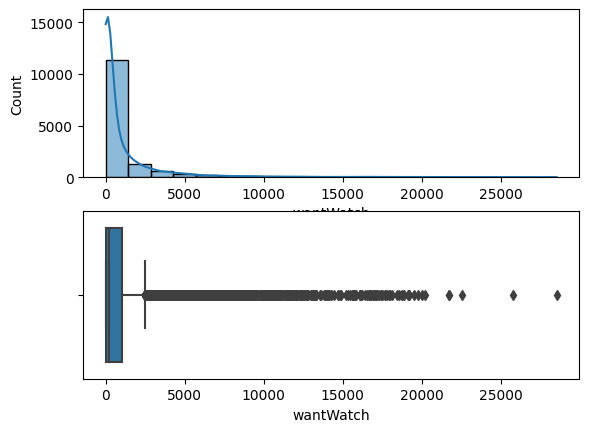

In [189]:
analysis_numeric("wantWatch")

'''
Data Description
- mean is 1036.92
- float type (although it would make more sense as integer)
- range of values is (0, 28541)
- standard deviation is 2161.96
- interquartile range is (24, 1007)

Data Cleaning
- no data preprocessing done

Observations
- since this dataset was taken during quarantine (2020), when TV shows/movies had became more popular, it makes sense
  that a lot of animes have a high wantWatch value, as many users must be binging many animes on the site
- right-skewed, still proving that only the top few animes are popular (which models real life)
'''

count    14134.000000
mean       127.585043
std        444.559724
min          0.000000
25%          1.000000
50%          7.000000
75%         42.000000
max      19481.000000
Name: dropped, dtype: float64


"\nData Description\n- mean is 127.58\n- float type (although it would make more sense as integer)\n- range of values is (0, 19481)\n- standard deviation is 444.56\n- interquartile range is (1, 42)\n\nData Cleaning\n- no data preprocessing done\n\nObservations\n- (see comments on wantWatch) many users probably have no reason to drop an anime unless they heard bad reviews about it\n  (which we can see in rating) or other factors that we don't know\n- dropped = to users who did not complete the anime, so its probably correlated to duration, eps\n"

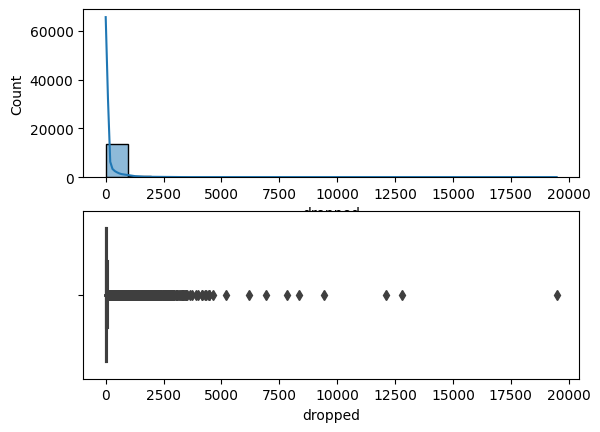

In [190]:
analysis_numeric("dropped")

'''
Data Description
- mean is 127.58
- float type (although it would make more sense as integer)
- range of values is (0, 19481)
- standard deviation is 444.56
- interquartile range is (1, 42)

Data Cleaning
- no data preprocessing done

Observations
- (see comments on wantWatch) many users probably have no reason to drop an anime unless they heard bad reviews about it
  (which we can see in rating) or other factors that we don't know
- dropped = to users who did not complete the anime, so its probably correlated to duration, eps
'''

count    14134.000000
mean         0.099972
std          0.299973
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: contentWarn, dtype: float64


"\nData Description\n- mean is 0.1\n- float type (although it would make more sense as integer/boolean)\n- range of values is (0, 1)\n- standard deviation is 0.3\n- interquartile range is (0, 0)\n\nData Cleaning\n- no data preprocessing done\n\nObservations\n- animes with a content warning have slightly higher ratings on average\n- MOST animes don't have a content warning, this could be related to certain tags (genres)?\n"

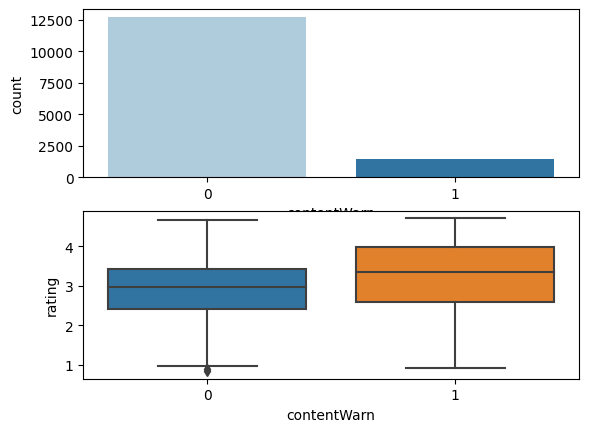

In [191]:
analysis_categorical("contentWarn","rating")

'''
Data Description
- mean is 0.1
- float type (although it would make more sense as integer/boolean)
- range of values is (0, 1)
- standard deviation is 0.3
- interquartile range is (0, 0)

Data Cleaning
- no data preprocessing done

Observations
- animes with a content warning have slightly higher ratings on average
- MOST animes don't have a content warning, this could be related to certain tags (genres)?
'''

count       14134
unique          5
top       Unknown
freq        10475
Name: sznOfRelease, dtype: object


'\nData Description\n- most common is unknown\n- string type\n- range of values is (fall, spring, summer, winter, unknown)\n- normally distributed\n- categorical data, not numeric\n\nData Cleaning\n- for all values that were NaN, they were replaced with "unknown" (most were unknown)\n\nObservations\n- unknown vs. rating is slightly more dispersed/skewed (theres an outlier and the IQR is not symmetrical)\n- since most seasons have the same rating/IQR, this may be a very weak factor in determining rating\n'

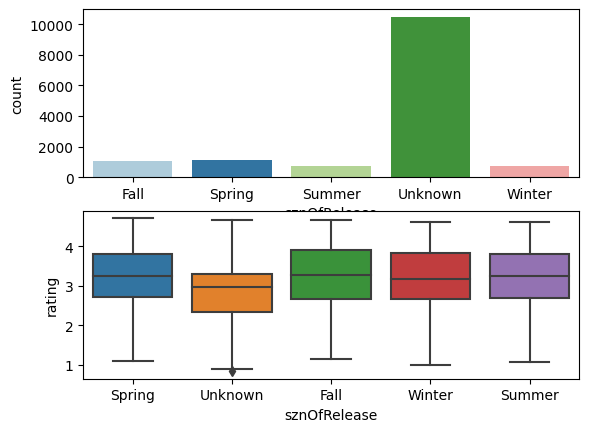

In [192]:
analysis_categorical("sznOfRelease","rating")

'''
Data Description
- most common is unknown
- string type
- range of values is (fall, spring, summer, winter, unknown)
- normally distributed
- categorical data, not numeric

Data Cleaning
- for all values that were NaN, they were replaced with "unknown" (most were unknown)

Observations
- unknown vs. rating is slightly more dispersed/skewed (theres an outlier and the IQR is not symmetrical)
- since most seasons have the same rating/IQR, this may be a very weak factor in determining rating
'''

count     14134
unique        1
top       False
freq      14134
Name: ongoing, dtype: object


'\nData Description\n- most common is False\n- there are no values of True\n- normally distributed versus rating\n- string type\n- categorical data\n\nData Cleaning\n- in the original dataset, all animes where finishYr = NaN were removed\n- however, finishYr = NaN indicated that anime had not ended, thus ongoing = True\n- so all animes with ongoing = True were dropped\n\nObservations\n- incomplete/inconclusive data\n'

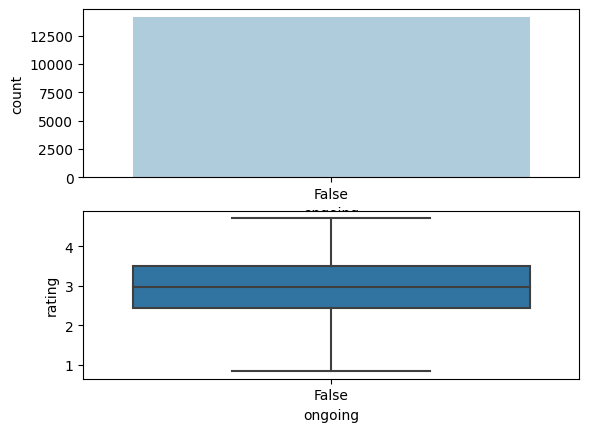

In [193]:
analysis_categorical("ongoing", "rating")

'''
Data Description
- most common is False
- there are no values of True
- normally distributed versus rating
- string type
- categorical data

Data Cleaning
- in the original dataset, all animes where finishYr = NaN were removed
- however, finishYr = NaN indicated that anime had not ended, thus ongoing = True
- so all animes with ongoing = True were dropped

Observations
- incomplete/inconclusive data
'''

                tag  count
1  Based on a Manga   3732
0            Comedy   3714
2            Action   2974
3           Fantasy   2455
4            Sci Fi   2177


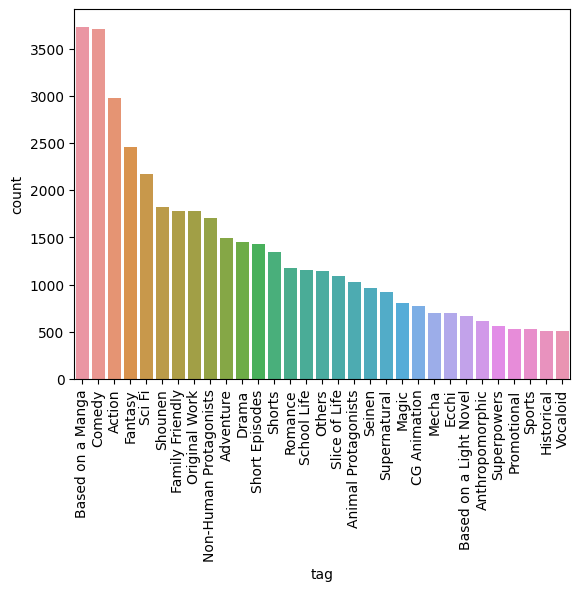

In [194]:
#TAGS
tagcols = []
for i in df.columns:
    if i.startswith("tag"):
        tagcols.append(i)
        

#keep track of number of animes with certain tags:
tagcounts = pd.DataFrame({
    "tag":[],
    "count":[]
})

# checking the values in tag columns
for col in tagcols:
    counts = df[col].value_counts()
    tagcounts.loc[len(tagcounts.index)] = [str(col).removeprefix("tag_").replace("'", ""), counts.get(1)]

#sort tagcounts in descending order
tagcounts = tagcounts.sort_values("count", ascending=False)

#lets graph the tags
sns.barplot(data=tagcounts, x="tag", y="count")
locs,labels = plt.xticks()
plt.setp(labels, rotation=90)

print(tagcounts.head(5))

count     14134
unique        8
top          TV
freq       4343
Name: mediaType, dtype: object


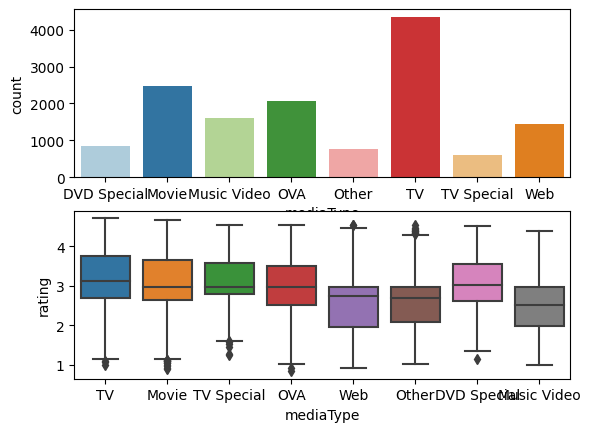

In [196]:
#which media types make the highest-rated animes (bar graph)
analysis_categorical("mediaType","rating")

'''
Data Description
- most common is TV
- TV, Movie, OVA, Web are majority --> most common modern formats
- almost normally distributed versus rating
- string type
- categorical data

Data Cleaning
- all values of NaN were replaced with "Other"

Observations
- some Web and Other animes have outstanding ratings
- TV, Movie, TV Special, OVA, DVD Special have outliers with low ratings
- IQR shows that Web, Other, Music Video tend to have lower ratings, the rest tend to have higher ratings
'''

#### Bivariate Analysis

<AxesSubplot:>

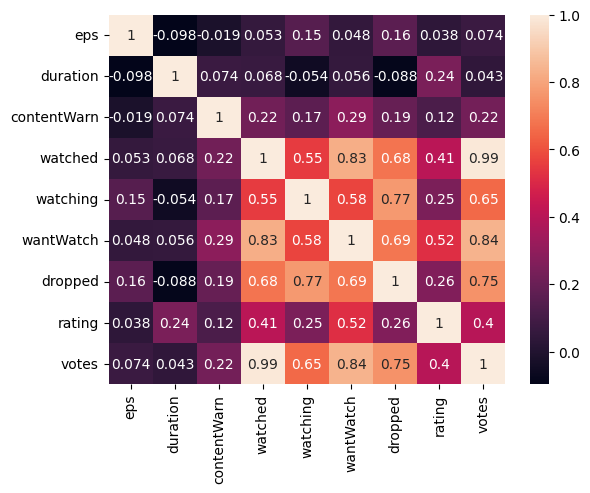

In [199]:
#heatmap
sns.heatmap(data=df[['mediaType', 'eps', 'duration', 'sznOfRelease', 'contentWarn',
'watched', 'watching', 'wantWatch', 'dropped', 'rating', 
'votes']].corr(),annot=True)

#votes and watched are VERY highly correlated,rating must be accurate (everyone that watched the anime voted)
#its also interesting that animes that are currently being watched seem to have lower ratings
#eps, duration, contentWarn dont seem to be correlated with anything (including rating --> not a huge factor)

In [197]:
#which studios make the highest rated movies
studio_ratings = {
    'Toei Animation': [], 'Sunrise': [], 'TMS Entertainment': [], 
       'J.C. Staff': [], 'MADHOUSE': [], 'Production I.G': [], 
       'Studio Deen': [], 'OLM': [], 'Studio Pierrot': [], 
       'A-1 Pictures': [], 'Shin-Ei Animation': [], 'DLE': [], 
       'Nippon Animation': [], 'AIC': [], 'Tatsunoko Production': [], 
       'XEBEC': [], 'GONZO': [], 'Bones': [], 'Shaft': [], 
       'Kyoto Animation': [], 'Group TAC': [], 'Satelight': [], 
       'SILVER LINK': [], 'Ashi Productions': [], 'Studio 4°C': [], 
       'Doga Kobo': [], 'Gainax': [], 'Magic Bus': [], 
       'Tezuka Productions': [], 'Zexcs': [], 'feel.': [], 
       'CoMix Wave Films': [], 'Mushi Production': [], 'Gallop': [], 
       'ufotable': [], 'Studio Comet': [], 'LIDEN FILMS': [], 'Mappa': [], 
       'ARMS': [], 'Actas': [], 'Ajia-do': [], 'TNK': [], 'Lerche': [], 
       'Studio Ghibli': [], 'diomedea': [], 'Studio Hibari': [], 
       'P.A. Works': [], 'Artland': [], 'Wit Studio': []
}

for i in range(0,df.shape[0] - 1):
    rating = df.iloc[i]["rating"] 
    for j in df2.columns:
        if df2.iloc[i][j] == 1: #problem, this is always false
            studio_ratings[j].append(rating)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,studio,rating,num_animes
17,Bones,3.751317,123
48,Wit Studio,3.750875,50
19,Kyoto Animation,3.713018,109
42,Lerche,3.693686,51
9,A-1 Pictures,3.598015,193
18,Shaft,3.566172,114
34,ufotable,3.531371,62
5,Production I.G,3.517895,268
43,Studio Ghibli,3.486880,51
22,SILVER LINK,3.389670,95


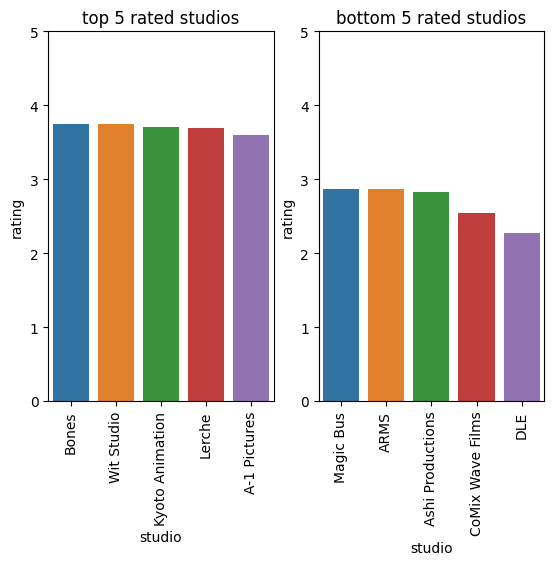

In [198]:
#for every dictionary entry, compute its mean rating
for st, rats in studio_ratings.items():
    studio_ratings[st] = np.mean(rats)

#lets also convert dictionary --> dataframe
df3 = pd.DataFrame({
    "studio" : studio_ratings.keys(),
    "rating" : studio_ratings.values()
})
df3 = df3.dropna(axis=0) #drop all studios with NaN (some of them are NaN because there were no ratings)
df3 = df3.sort_values("rating", ascending=False)

#lets also get how many animes each studio produced
num = []
for i in df3.studio:
    num.append(stsums.get(i))

df3["num_animes"] = num

plt.subplot(1, 2, 1)
fig1 = sns.barplot(data=df3.head(5), x="studio", y="rating")
plt.ylim(0, 5)
plt.title("top 5 rated studios")
# orient x-axis labels at 90 deg
locs,labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=df3.tail(5), x="studio", y="rating")
plt.ylim(0, 5)
plt.title("bottom 5 rated studios")
# orient x-axis labels at 90 deg
locs,labels = plt.xticks()
plt.setp(labels, rotation=90)

df3

#studios with higher num_animes would be more accurate in their rating
#difference between Bones (top rated, 3.75) and DLE (bottom rated, 2.27) is 1.48 (more than 20% of range of rating values!)
#seems like studio does have an effect on the rating